In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

import matplotlib.pyplot as plt

In [2]:
sales_dat = pd.read_csv('Sales.csv')
nyop_dat = pd.read_csv('NYOP.csv')

In [3]:
sales_dat.head()

,Condition,NumberSold,Riders,MerchandiseRevenues
0,FR,77,12663,4592.41
1,FR,63,15561,6688.57
2,FR Charity,79,14796,6476.78
3,FR Charity,101,15796,5845.94
4,NYOP,1137,14077,4845.27


# Flat Rate Pricing

$$
H_0: p_1 = p_2 \\ 
H_a: p_1 \ne p_2
$$

We are attempting to see difference in proportions between the charity and non charity cases. Under the null, we expect such proportions to be equal, whereas the alternative believes the proportions to be different.

In [4]:
flat_rates = sales_dat[(sales_dat['Condition'] == "FR") | (sales_dat['Condition'] == "FR Charity")]
fr_rates = flat_rates.groupby('Condition')['NumberSold'].sum() / flat_rates.groupby('Condition')['Riders'].sum()
fr_rates

Condition
FR            0.004960
FR Charity    0.005884
dtype: float64

In [5]:
n_s = flat_rates.groupby('Condition')['Riders'].sum()
n_s

Condition
FR            28224
FR Charity    30592
Name: Riders, dtype: int64

In [6]:
p1 = fr_rates.iloc[0]
p2 = fr_rates.iloc[1]
n1 = n_s.iloc[0]
n2 = n_s.iloc[1]

In [7]:
pt1 = p1*(1-p1) / n1
pt2 = p2*(1-p2) / n2
denom = np.sqrt(pt1 + pt2)

test_stat = (p1-p2) / denom # Test statistic Z-score
test_stat

-1.5264554280529021

In [8]:
2 * (1 - norm.cdf(abs(test_stat))) # P value

0.12689648269385967

There is a 12.689 chance that the FR and FR Charity sales values occur under a normal distribution. Hence, as it is over the 5 percent significance level, you will fail to reject the chance that there is no difference between the proportion of purchases. In other words, we see that the given proportions is likely enough to consider under a normal distribution.

# NYOP Pricing

In [9]:
NYOP_sales = sales_dat[(sales_dat['Condition'] == 'NYOP') | (sales_dat['Condition'] == 'NYOP Charity')]
NYOP_sales

,Condition,NumberSold,Riders,MerchandiseRevenues
4,NYOP,1137,14077,4845.27
5,NYOP,1233,14186,7038.63
6,NYOP Charity,539,12227,5690.59
7,NYOP Charity,628,13741,6003.44
8,NYOP Charity,626,18117,8557.47


In [10]:
NYOP_rates = NYOP_sales.groupby('Condition')['NumberSold'].sum() / NYOP_sales.groupby('Condition')['Riders'].sum()
NYOP_rates

Condition
NYOP            0.083855
NYOP Charity    0.040671
dtype: float64

In [11]:
n_s = NYOP_sales.groupby('Condition')['Riders'].sum()
n_s

Condition
NYOP            28263
NYOP Charity    44085
Name: Riders, dtype: int64

In [12]:
p1 = NYOP_rates.iloc[0]
p2 = NYOP_rates.iloc[1]
n1 = n_s.iloc[0]
n2 = n_s.iloc[1]

In [13]:
pt1 = p1*(1-p1) / n1
pt2 = p2*(1-p2) / n2
denom = np.sqrt(pt1 + pt2)

test_stat = (p1-p2) / denom
test_stat # Z score test stat

22.749707261972425

In [14]:
2 * (1 - norm.cdf(abs(test_stat))) # P val

0.0

There is a 0 percent chance that the NYOP purchase rates occur under a normal distribution. Therefore, you must reject the null hypothesis that there is no difference between the proportion of purchases of the NYOP and NYOP charity. Hence, we must conclude that for the NYOP case, that there is statistical difference between the charity and non charity case.

# Section 2

## Part A

In [15]:
nyop_dat.head()

,Condition,Number,Price
0,NYOP,1,1.00
1,NYOP,1,1.00
2,NYOP,1,0.01
3,NYOP,1,0.10
4,NYOP,1,0.01


In [16]:
nyop_dat['UnitPrice'] = nyop_dat['Price'] / nyop_dat['Number']
nyop_dat.head()

,Condition,Number,Price,UnitPrice
0,NYOP,1,1.00,1.00
1,NYOP,1,1.00,1.00
2,NYOP,1,0.01,0.01
3,NYOP,1,0.10,0.10
4,NYOP,1,0.01,0.01


## Part B

In [17]:
nyop_dat['Number'] = pd.Categorical(nyop_dat['Number'])

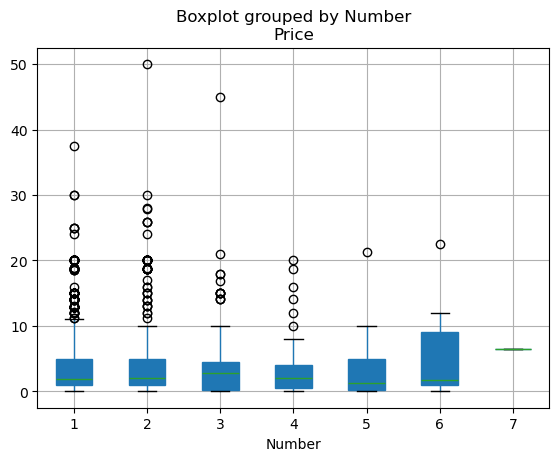

In [18]:
nyop_dat.boxplot(column='Price',by='Number', patch_artist = True)
plt.show()

Under the the various number of photos bought against the Price, we see that there is no strong relationship between the two variables. Although under 50 percent of the time, we see that the price paid for photos is between 0 and 10 dollars, there are a significant spread of out outliers that consider at each price level except for the 7 photo case. 

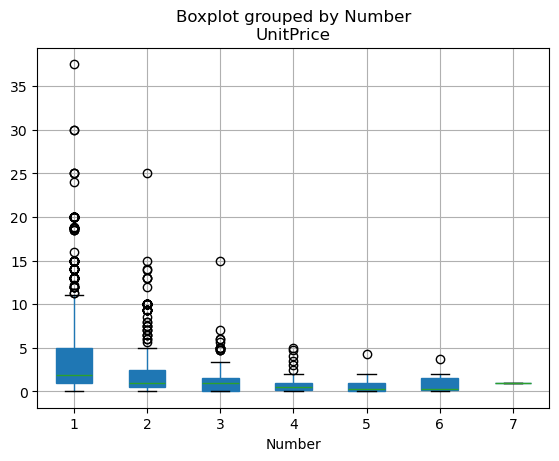

In [19]:
nyop_dat.boxplot(column='UnitPrice',by='Number', patch_artist = True)
plt.show()

Unlike the price relationship, we see in this case there is a clear negative relationship between the number and unit price for the photos paid under the NYOP case. Overall, as the number of photos increases, we see that the price paid per photo decreases. This seems to hold under the center spread between the 25th and 75th percentile and the outlier values.

## Part C

In [20]:
avg_unit_price = nyop_dat.groupby('Condition')['UnitPrice'].mean()
avg_unit_price

Condition
NYOP            1.040439
NYOP Charity    5.680480
Name: UnitPrice, dtype: float64

There seems to be a substantial difference between the unit price of the charity and non charity cases. To do this, we can compare the difference in means under the two conditions with a two sided test.

## Part D

$$
H_0: UnitPrice_{\text{NYOP}} = UnitPrice_{\text{NYOP Charity}} \\
H_a: UnitPrice_{\text{NYOP}} \ne UnitPrice_{\text{NYOP Charity}}
$$

Under the null we expect the unit price between the charity and non charity case to be the same; or in other words, there is no significance difference in the average unit price for both conditions.

In [21]:
import pyrsm as rsm

## Part E

In [22]:
cm = rsm.basics.compare_means({'NYOP': nyop_dat}, var1='Condition', var2='UnitPrice', alt_hyp='two-sided')
cm.summary()

Pairwise mean comparisons (t-test)
Data      : NYOP
Variables : Condition, UnitPrice
Samples   : independent
Confidence: 0.95
Adjustment: None
   Condition  mean    n  n_missing    sd    se    me
        NYOP  1.04 1641          0 1.305 0.032 0.063
NYOP Charity  5.68 1457          0 4.670 0.122 0.240
          Null hyp.                      Alt. hyp.  diff p.value    
NYOP = NYOP Charity NYOP not equal to NYOP Charity -4.64  < .001 ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


- Type 1: Under a significance level level of 5 percent, there is a 5 percent chance of claiming that the average unit price under the two conditions are difference when there is none.
- Type 2: If we fail to reject the null hypothesis to state that there is no difference when there actually was.

Regardless, under both circumstances, we see that because the p value is smaller than 0.001, there is an extremely small likelihood that a Type 1 or even a Type 2 is committed under this difference of means t-test.

## Part F

In [24]:
one_pic = nyop_dat[nyop_dat['Number'] == 1]
six_pic = nyop_dat[nyop_dat['Number'] == 6]

In [262]:
cm2 = rsm.basics.compare_means({'one_pic': one_pic}, var1='Condition', var2='UnitPrice', alt_hyp='two-sided')
cm2.summary()

Pairwise mean comparisons (t-test)
Data      : one_pic
Variables : Condition, UnitPrice
Samples   : independent
Confidence: 0.95
Adjustment: None
   Condition  mean    n  n_missing    sd    se    me
        NYOP 1.177 1162          0 1.432 0.042 0.082
NYOP Charity 5.941 1203          0 4.830 0.139 0.273
          Null hyp.                      Alt. hyp.   diff p.value    
NYOP = NYOP Charity NYOP not equal to NYOP Charity -4.765  < .001 ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Under this condition, we see that the p value for the 1 picture condition is extremely small. Hence, we reject the null hypothesis that there is a difference between the mean unit price between the charity and non charity case. 

In [263]:
cm3 = rsm.basics.compare_means({'six_pic': six_pic}, var1='Condition', var2='UnitPrice', alt_hyp='two-sided')
cm3.summary()

Pairwise mean comparisons (t-test)
Data      : six_pic
Variables : Condition, UnitPrice
Samples   : independent
Confidence: 0.95
Adjustment: None
   Condition  mean  n  n_missing    sd    se    me
        NYOP 0.495  6          0 0.615 0.251 0.646
NYOP Charity 1.970  3          0 1.795 1.036 4.459
          Null hyp.                      Alt. hyp.   diff p.value  
NYOP = NYOP Charity NYOP not equal to NYOP Charity -1.475   0.288  

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Under this condition, we see that the p value for the 6 picture condition is at 0.288; this is the large compared to the 0.05 significance level. Hence, we fail to reject the null hypothesis that there is a difference between the mean unit price between the charity and non charity case. 

## Part G

$$
H_0: \mu_1 = \mu_2 \\
H_a: \mu_1 \ne \mu_2
$$

Under the 6 picture case, the null states that the means between the charity and non charity case is the same. The alternative hypothesis case states that the means between the two cases are not the same.

In [25]:
six_pic.head()

,Condition,Number,Price,UnitPrice
296,NYOP,6,0.06,0.01
356,NYOP,6,6.00,1.00
382,NYOP,6,0.90,0.15
623,NYOP,6,0.06,0.01
1445,NYOP,6,9.00,1.50


In [26]:
six_nyop = six_pic[six_pic['Condition'] == 'NYOP']['UnitPrice']
six_char = six_pic[six_pic['Condition'] == 'NYOP Charity']['UnitPrice']

In [27]:
from scipy.stats import t

In [39]:
xbar_1 = six_nyop.mean()
xbar_2 = six_char.mean()
s1 = six_nyop.std(ddof=1)
s2 = six_char.std(ddof=1)
n1 = len(six_nyop)
n2 = len(six_char)

In [43]:
SE = np.sqrt((s1**2 / n1) + (s2**2 / n2))

In [44]:
t_val = (xbar_1 - xbar_2) / SE
t_val

-1.3830917803702296

In [54]:
numer = (s1**2 / n1 + s2**2 / n2)**2
denom = (s1**2 / n1)**2 / (n1 -1) + (s2**2 / n2)**2 / (n2-1)
dof = numer/denom # Use welch's t test, so variances are not equal

In [55]:
pval = (1 - t.cdf(abs(t_val), df=dof)) * 2
pval

0.2884114566627223

According to this difference of means test, we see that the test coincides as part f. Overall, we fail to reject the null hypothesis as the p value is much larger than the 0.05 significance level. 

# Economics

# Part A + B

## FR Case

In [271]:
sales_dat

,Condition,NumberSold,Riders,MerchandiseRevenues
0,FR,77,12663,4592.41
1,FR,63,15561,6688.57
2,FR Charity,79,14796,6476.78
3,FR Charity,101,15796,5845.94
4,NYOP,1137,14077,4845.27
5,NYOP,1233,14186,7038.63
6,NYOP Charity,539,12227,5690.59
7,NYOP Charity,628,13741,6003.44
8,NYOP Charity,626,18117,8557.47


In [272]:
fr_data = sales_dat[(sales_dat['Condition'] == 'FR') | (sales_dat['Condition'] == 'FR Charity')].copy()
fr_data['cogs'] = fr_data['NumberSold'] * 1.2
fr_data['revenues'] = fr_data['NumberSold'] * 12.95
fr_data.loc[fr_data['Condition'] == 'FR Charity', 'revenues'] = fr_data.loc[fr_data['Condition'] == 'FR Charity', 'revenues'] * 0.5
fr_data['profit'] = fr_data['revenues'] - fr_data['cogs']

In [273]:
fr_avg_profit = fr_data.groupby('Condition')['profit'].mean()
fr_avg_profit

Condition
FR            822.50
FR Charity    474.75
Name: profit, dtype: float64

## NYOP Case

In [274]:
nyop_dat

,Condition,Number,Price,UnitPrice
0,NYOP,1,1.00,1.00
1,NYOP,1,1.00,1.00
2,NYOP,1,0.01,0.01
3,NYOP,1,0.10,0.10
4,NYOP,1,0.01,0.01
...,...,...,...,...
3093,NYOP Charity,1,9.38,9.38
3094,NYOP Charity,1,1.00,1.00
3095,NYOP Charity,1,0.93,0.93
3096,NYOP Charity,1,9.38,9.38


In [275]:
nyop_dat_rev = nyop_dat.copy()
nyop_dat_rev['Number'] = (nyop_dat_rev['Number']).astype(int)
nyop_dat_rev['cogs'] = nyop_dat_rev['Number'] * 1.2
nyop_dat_rev['revenues'] = nyop_dat_rev['Price'] * nyop_dat_rev['Number']
nyop_dat_rev.loc[nyop_dat_rev['Condition'] == 'NYOP Charity', 'revenues'] = nyop_dat_rev.loc[nyop_dat_rev['Condition'] == 'NYOP Charity', 'revenues'] * 0.5
nyop_dat_rev['profit'] = nyop_dat_rev['revenues'] - nyop_dat_rev['cogs']
nyop_dat_rev

,Condition,Number,Price,UnitPrice,cogs,revenues,profit
0,NYOP,1,1.00,1.00,1.2,1.000,-0.200
1,NYOP,1,1.00,1.00,1.2,1.000,-0.200
2,NYOP,1,0.01,0.01,1.2,0.010,-1.190
3,NYOP,1,0.10,0.10,1.2,0.100,-1.100
4,NYOP,1,0.01,0.01,1.2,0.010,-1.190
...,...,...,...,...,...,...,...
3093,NYOP Charity,1,9.38,9.38,1.2,4.690,3.490
3094,NYOP Charity,1,1.00,1.00,1.2,0.500,-0.700
3095,NYOP Charity,1,0.93,0.93,1.2,0.465,-0.735
3096,NYOP Charity,1,9.38,9.38,1.2,4.690,3.490


In [276]:
nyop_daily = (nyop_dat_rev.loc[nyop_dat_rev['Condition'] == 'NYOP', :].groupby('Condition').sum() / 2)['profit']
nyop_char_daily = (nyop_dat_rev.loc[nyop_dat_rev['Condition'] == 'NYOP Charity', :].groupby('Condition').sum() / 3)['profit']

In [277]:
nyop_daily_prof = pd.concat([nyop_daily, nyop_char_daily])
nyop_daily_prof

Condition
NYOP             330.510000
NYOP Charity    1431.738333
Name: profit, dtype: float64

### All daily Profit

In [278]:
all_daily = pd.concat([nyop_daily_prof, fr_avg_profit])
all_daily.sort_values(ascending=False)

Condition
NYOP Charity    1431.738333
FR               822.500000
FR Charity       474.750000
NYOP             330.510000
Name: profit, dtype: float64

In [57]:
all_daily.idxmax() # The highest profit strategy

NameError: name 'all_daily' is not defined

# Part C

In [280]:
charity_dat = fr_data[fr_data['Condition'].str.contains('Charity')]
charity_dat

,Condition,NumberSold,Riders,MerchandiseRevenues,cogs,revenues,profit
2,FR Charity,79,14796,6476.78,94.8,511.525,416.725
3,FR Charity,101,15796,5845.94,121.2,653.975,532.775


In [281]:
chairty_rev_fr = ((charity_dat['NumberSold'] * 12.95 - charity_dat['NumberSold'] * 1.2) * 0.5).sum()
chairty_rev_fr

1057.5

In [282]:
nyop_dat_charity = nyop_dat_rev[nyop_dat_rev['Condition'].str.contains('Charity')].copy()
nyop_dat_charity.loc[:,'charity'] = nyop_dat_charity.loc[:,'revenues']
charity_rev_nyop = nyop_dat_charity['charity'].sum()
charity_rev_nyop

6446.815

In [283]:
charity_profit = pd.DataFrame({'Rev': [charity_rev_nyop, chairty_rev_fr], 'Type': ['NYOP', 'FR']})
charity_profit

,Rev,Type
0,6446.815,NYOP
1,1057.500,FR


In [56]:
charity_profit.sort_values('Rev').loc[0, 'Type'] #The highest strategy for making largest societal profit.

NameError: name 'charity_profit' is not defined

# Q4

In [285]:
sales_dat

,Condition,NumberSold,Riders,MerchandiseRevenues
0,FR,77,12663,4592.41
1,FR,63,15561,6688.57
2,FR Charity,79,14796,6476.78
3,FR Charity,101,15796,5845.94
4,NYOP,1137,14077,4845.27
5,NYOP,1233,14186,7038.63
6,NYOP Charity,539,12227,5690.59
7,NYOP Charity,628,13741,6003.44
8,NYOP Charity,626,18117,8557.47


In [286]:
charity_profit.loc[charity_profit['Type'] == 'NYOP', 'Rev'] = charity_profit.loc[charity_profit['Type'] == 'NYOP', 'Rev'] / 3
charity_profit.loc[charity_profit['Type'] == 'FR', 'Rev'] = charity_profit.loc[charity_profit['Type'] == 'FR', 'Rev'] / 2

In [58]:
charity_profit['Yearly_Profit'] = charity_profit['Rev'] * 365
charity_profit['Yearly_Profit'][::-1].diff().iloc[1] # The difference between the strategy profits

NameError: name 'charity_profit' is not defined

# Q5

In [288]:
grouped_sales = sales_dat.groupby('Condition').sum().reset_index()
grouped_sales

,Condition,NumberSold,Riders,MerchandiseRevenues
0,FR,140,28224,11280.98
1,FR Charity,180,30592,12322.72
2,NYOP,2370,28263,11883.90
3,NYOP Charity,1793,44085,20251.50


In [289]:
grouped_sales['MerchSpendingPerRider'] = grouped_sales['MerchandiseRevenues'] / grouped_sales['Riders']
grouped_sales['PhotoBuyerMerch'] = grouped_sales['MerchandiseRevenues'] / grouped_sales['NumberSold']
grouped_sales

,Condition,NumberSold,Riders,MerchandiseRevenues,MerchSpendingPerRider,PhotoBuyerMerch
0,FR,140,28224,11280.98,0.399695,80.578429
1,FR Charity,180,30592,12322.72,0.402809,68.459556
2,NYOP,2370,28263,11883.90,0.420476,5.014304
3,NYOP Charity,1793,44085,20251.50,0.459374,11.294757


In [237]:
sales_dat['MerchSpendingPerRider'] = sales_dat['MerchandiseRevenues'] / sales_dat['Riders']
sales_dat['PhotoBuyerMerch'] = sales_dat['MerchandiseRevenues'] / sales_dat['NumberSold']
sales_dat

,Condition,NumberSold,Riders,MerchandiseRevenues,MerchSpendingPerRider,PhotoBuyerMerch
0,FR,77,12663,4592.41,0.362664,59.641688
1,FR,63,15561,6688.57,0.429829,106.167778
2,FR Charity,79,14796,6476.78,0.437739,81.984557
3,FR Charity,101,15796,5845.94,0.370090,57.880594
4,NYOP,1137,14077,4845.27,0.344198,4.261451
5,NYOP,1233,14186,7038.63,0.496167,5.708540
6,NYOP Charity,539,12227,5690.59,0.465412,10.557681
7,NYOP Charity,628,13741,6003.44,0.436900,9.559618
8,NYOP Charity,626,18117,8557.47,0.472345,13.670080


The general concern for merchandise sales is related to the crowding out effect of photo purchases against merchandise purchases. Overall, we see that the merchandise spending per rider does not change across the condition they are facing without considering the fact that each person did or did not buy any photos. If anything we see that there is no identifiable relationship between the merchandise sales and photo purchasing. Under examination of the aggregated data, we see that merchandise revenue per rider is the highest under the NYOP + charity condition. Overall, we can see that incorporating SSR into the park's pricing strategy may create perception of positive corporate social responsibility which minimizes the firm's profit driven motivations. 